In [1]:
# import das bibliotecas

import numpy as np
import networkx as nx

import pandas as pd

import matplotlib . pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches

# Métricas de centralidade

Considere um grafo $G =(V,E)$ onde $|V| = n$, $|E| = m$.

In [61]:
# grafo karate club
KCG = nx.karate_club_graph()

In [62]:
# imprime uma lista com os nós de g (karate club)
nodes_ = KCG.nodes()
print(f'nodes: {nodes_}')

# imprime uma lista com as arestas de g (karate club)
edges_ = KCG.edges()
print(f'arestas: {edges_}')

nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
arestas: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


In [63]:
n = nx.number_of_nodes(KCG) # número de nos
m = nx.number_of_edges(KCG) # número de arestas

print(f"numero de nos: {n}")
print(f"numero de arestas: {m}")

numero de nos: 34
numero de arestas: 78


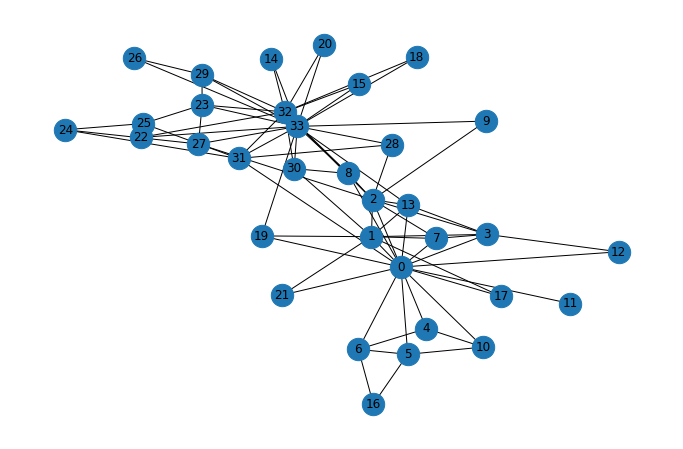

In [64]:
# grafico da grafo

fig, ax = plt.subplots(figsize=(12,8))

# imprime o grafo
nx.draw(KCG, node_size=500, with_labels = True)

plt.show()

### Grau de centralidade

A métrica de **grau** refere-se ao número de links de cada nó da rede. 

**nx.degree()**: função do networkx que retorna o grau cada nó da rede.

In [229]:
# calcula o graus de cada no
dic_grau = dict(nx.degree(KCG))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

Grau = {1, 2, 3, 4, 5, 6, 9, 10, 12, 16, 17}
1 : 11, 
2 : 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 
3 : 4, 10, 19, 24, 25, 28, 
4 : 5, 6, 7, 27, 29, 30, 
5 : 8, 13, 23, 
6 : 3, 31, 
9 : 1, 
10 : 2, 
12 : 32, 
16 : 0, 
17 : 33, 


In [230]:
# rank em relacao ao grau

ranks = [(k, v) for k, v in sorted(dic_grau.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 17),
 (0, 16),
 (32, 12),
 (2, 10),
 (1, 9),
 (3, 6),
 (31, 6),
 (8, 5),
 (13, 5),
 (23, 5)]

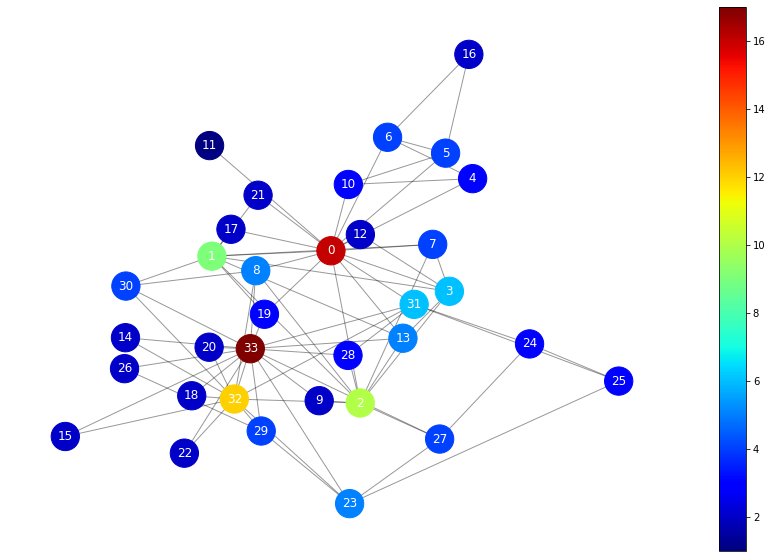

In [231]:
# grafico com graus

fig, ax = plt.subplots(1,1,figsize=(15,10))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# define a cor do nos
color = list(dic_grau.values())

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

A métrica de **grau de centralidade** atribui uma pontuação(fração) de importância com base no número de links mantido por cada nó.

Essa métrica nos fala o quanto direto é a conexão de um nó com os outros nós da rede.

A métrica **grau de centralidade** do nó $i$ é dado pela fórmula $\dfrac{grau(i)}{|V|}$ para cada $i \in V$.

**nx.degree_centrality()**: função do networkx que retorna o grau de centralidade de cada nó da rede.

In [232]:
# grau de centralidade dos nodes da rede

dic_grau_center = nx.degree_centrality(KCG)
val_grau_center = dic_grau_center.values()

#set_grau_center = set(dic_grau_center.values())

#print(f"Grau_center: {set_grau_center}")

#for i in set_grau_center:
#    print(i, end= " : ")
#    for key, value in dic_grau_center.items():
#        if i == dic_grau_center[key]:
#            print(key, end=", ")
#    print()

In [233]:
# rank em relacao a centralidade de grau

ranks = [(k, v) for k, v in sorted(dic_grau_center.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 0.5151515151515151),
 (0, 0.48484848484848486),
 (32, 0.36363636363636365),
 (2, 0.30303030303030304),
 (1, 0.2727272727272727),
 (3, 0.18181818181818182),
 (31, 0.18181818181818182),
 (8, 0.15151515151515152),
 (13, 0.15151515151515152),
 (23, 0.15151515151515152)]

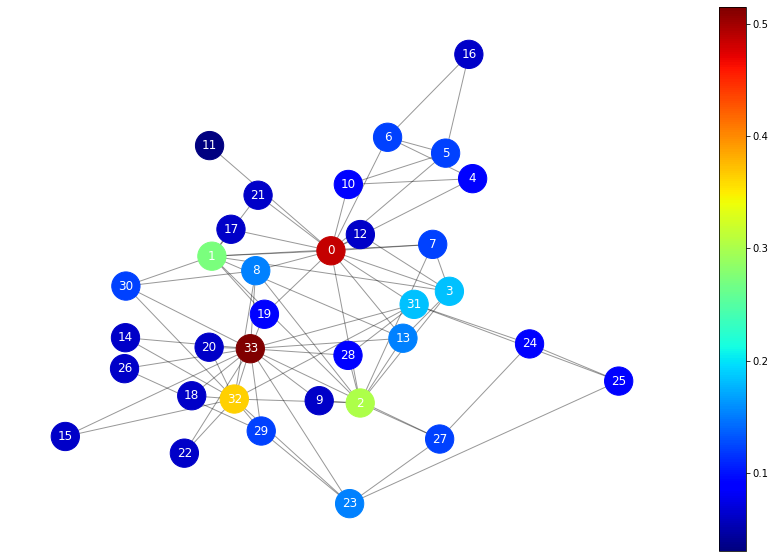

In [234]:
# grau de centralidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_grau_center)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               node_size=800,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

## Métricas geométricas

### Centralidade de excentricidade

Seja $G_i = (V_i,E_i)$ uma componente conexa de $G$ que contém o nó $i \in V$

A **excentricidade** do nó $i \in G_i$ é a maior distância geodésica de um $i$ aos demais nós de $G_i$. 

A **excentricidade** do nó $i$ é dado pela fórmula 
$$
ec(i) = \max_{j \in V_i} d(i,j) \; \forall \; i \in V_i
$$
onde $d(i,j)$ é o tamanho da distância geodésica do nó $i$ para o nó $j \in V_i$.

O **diâmetro** de um grafo é sua maior excentrecidade.
Maior distância geodésica(shortest path) entre dois nós em uma mesma componente.

A **periferia** de um grafo é o conjunto de todos os nós cujo a excentricidade é igual ao diâmetro.

O **raio** de um grafo é sua menor excentricidade.

O **centro** de um grafo é o conjunto de nós cujo valor da excentricidade é igual ao raio.

Funções do NetworkX:
- **nx.eccentricity()**: retorna a excentricidade de um grafo.
- **nx.diameter()**: retorna o diâmetro de um grafo.
- **nx.periphery()**: retorna a periferia de um grafo.
- **nx.radius()**: retorna o raio de um grafo.
- **nx.center()**: retorna o centro de um grafo.

In [235]:
# Exemplo de uma arvore binomial
#BTG = nx.binomial_tree(4)
#n = nx.number_of_nodes(BTG) # número de vértices
#m = nx.number_of_edges(BTG) # número de arestas

#print("numero de vertices:", n)
#print("numero de arestas:", m)

In [236]:
## Verifica se o grafo é conexo
print(nx.is_connected(KCG))

True


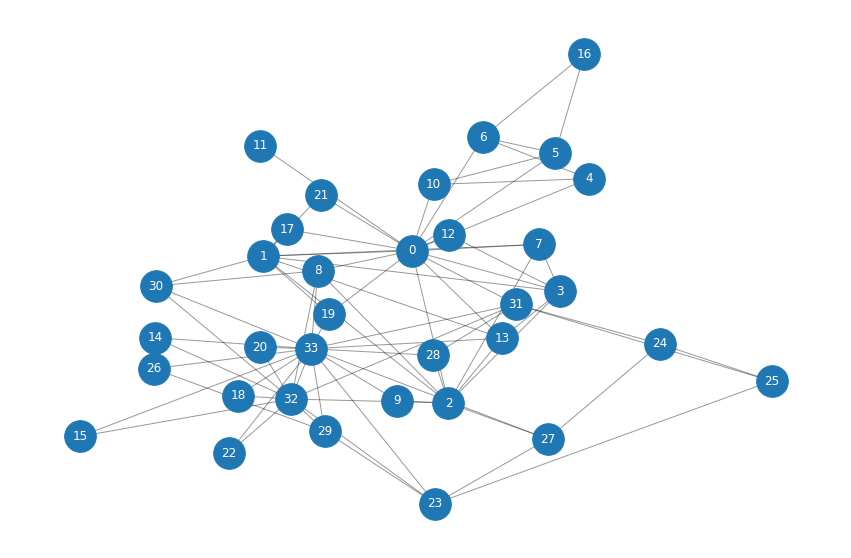

In [237]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

G = KCG

# layout position
#pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(G)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=1000,
                               pos=pos, 
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
#plt.savefig('KCG.png', transparent=True, dpi=300)
plt.show()

In [238]:
# Encontra as distâncias geodésica(sp)
p = nx.shortest_path(KCG)
for key, value in p.items():
    print(f"sp partindo de {key}: {value}")

sp partindo de 0: {0: [0], 1: [0, 1], 2: [0, 2], 3: [0, 3], 4: [0, 4], 5: [0, 5], 6: [0, 6], 7: [0, 7], 8: [0, 8], 10: [0, 10], 11: [0, 11], 12: [0, 12], 13: [0, 13], 17: [0, 17], 19: [0, 19], 21: [0, 21], 31: [0, 31], 30: [0, 1, 30], 9: [0, 2, 9], 27: [0, 2, 27], 28: [0, 2, 28], 32: [0, 2, 32], 16: [0, 5, 16], 33: [0, 8, 33], 24: [0, 31, 24], 25: [0, 31, 25], 23: [0, 2, 27, 23], 14: [0, 2, 32, 14], 15: [0, 2, 32, 15], 18: [0, 2, 32, 18], 20: [0, 2, 32, 20], 22: [0, 2, 32, 22], 29: [0, 2, 32, 29], 26: [0, 8, 33, 26]}
sp partindo de 1: {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3], 7: [1, 7], 13: [1, 13], 17: [1, 17], 19: [1, 19], 21: [1, 21], 30: [1, 30], 4: [1, 0, 4], 5: [1, 0, 5], 6: [1, 0, 6], 8: [1, 0, 8], 10: [1, 0, 10], 11: [1, 0, 11], 12: [1, 0, 12], 31: [1, 0, 31], 9: [1, 2, 9], 27: [1, 2, 27], 28: [1, 2, 28], 32: [1, 2, 32], 33: [1, 13, 33], 16: [1, 0, 5, 16], 24: [1, 0, 31, 24], 25: [1, 0, 31, 25], 23: [1, 2, 27, 23], 14: [1, 2, 32, 14], 15: [1, 2, 32, 15], 18: [1, 2, 32, 18], 20:

In [239]:
# calculo do tamanhos da distâncias geodésica(sp) do grafo

d = np.zeros((n,n), dtype=int)
for i in KCG:
    sp = nx.shortest_path_length(KCG,i)

    for key, value in sp.items():
        d[i,key] = value

    for key, value in sp.items():
        if i<key:
            print(f"sp[{i},{key}]: {d[i,key]}")

sp[0,1]: 1
sp[0,2]: 1
sp[0,3]: 1
sp[0,4]: 1
sp[0,5]: 1
sp[0,6]: 1
sp[0,7]: 1
sp[0,8]: 1
sp[0,10]: 1
sp[0,11]: 1
sp[0,12]: 1
sp[0,13]: 1
sp[0,17]: 1
sp[0,19]: 1
sp[0,21]: 1
sp[0,31]: 1
sp[0,9]: 2
sp[0,16]: 2
sp[0,24]: 2
sp[0,25]: 2
sp[0,27]: 2
sp[0,28]: 2
sp[0,30]: 2
sp[0,32]: 2
sp[0,33]: 2
sp[0,14]: 3
sp[0,15]: 3
sp[0,18]: 3
sp[0,20]: 3
sp[0,22]: 3
sp[0,23]: 3
sp[0,26]: 3
sp[0,29]: 3
sp[1,2]: 1
sp[1,3]: 1
sp[1,7]: 1
sp[1,13]: 1
sp[1,17]: 1
sp[1,19]: 1
sp[1,21]: 1
sp[1,30]: 1
sp[1,4]: 2
sp[1,5]: 2
sp[1,6]: 2
sp[1,8]: 2
sp[1,9]: 2
sp[1,10]: 2
sp[1,11]: 2
sp[1,12]: 2
sp[1,27]: 2
sp[1,28]: 2
sp[1,31]: 2
sp[1,32]: 2
sp[1,33]: 2
sp[1,14]: 3
sp[1,15]: 3
sp[1,16]: 3
sp[1,18]: 3
sp[1,20]: 3
sp[1,22]: 3
sp[1,23]: 3
sp[1,24]: 3
sp[1,25]: 3
sp[1,26]: 3
sp[1,29]: 3
sp[2,32]: 1
sp[2,3]: 1
sp[2,7]: 1
sp[2,8]: 1
sp[2,9]: 1
sp[2,13]: 1
sp[2,27]: 1
sp[2,28]: 1
sp[2,4]: 2
sp[2,5]: 2
sp[2,6]: 2
sp[2,10]: 2
sp[2,11]: 2
sp[2,12]: 2
sp[2,14]: 2
sp[2,15]: 2
sp[2,17]: 2
sp[2,18]: 2
sp[2,19]: 2
sp[2,20]: 2
sp[2

In [240]:
# calculo da excentricidade

dic_ec  = nx.eccentricity(KCG)
val_ec  = list(dic_ec.values())

set_ec = set(dic_ec.values())
print(f"EC = {set_ec}")

for i in set_ec:
    print(f"{i}", end= " : ")
    for key, value in dic_ec.items():
        if i == dic_ec[key]:
            print(f"{key}", end=", ")
    print()

EC = {3, 4, 5}
3 : 0, 1, 2, 3, 8, 13, 19, 31, 
4 : 4, 5, 6, 7, 9, 10, 11, 12, 17, 21, 24, 25, 27, 28, 30, 32, 33, 
5 : 14, 15, 16, 18, 20, 22, 23, 26, 29, 


In [241]:
# rank em relacao a excentricidade

ranks = [(k, v) for k, v in sorted(dic_ec.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(14, 5),
 (15, 5),
 (16, 5),
 (18, 5),
 (20, 5),
 (22, 5),
 (23, 5),
 (26, 5),
 (29, 5),
 (4, 4)]

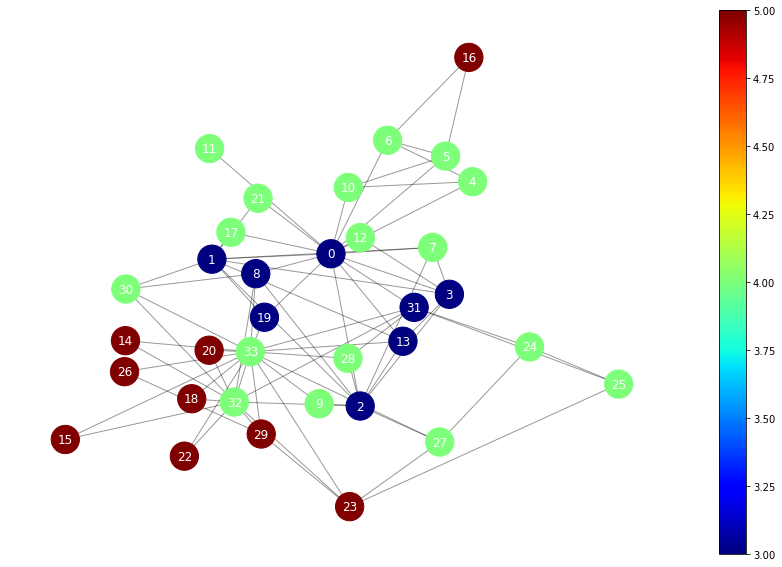

In [242]:
# grafico da excentricidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_ec)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [243]:
# the diameter of networks is the maximum eccentricy
diameter = nx.diameter(KCG)
print(f"Diamentro de G: {diameter}")

Diamentro de G: 5


In [244]:
# whom are in the diameter
diameter_set= [k for k,v in nx.eccentricity(KCG).items() if v == nx.diameter(KCG)]
print(f"Nós com diametro {diameter}: {diameter_set}")

Nós com diametro 5: [14, 15, 16, 18, 20, 22, 23, 26, 29]


In [245]:
# the periphery of a network is a set of all nodes whose eccentriciy is equals the diameter
periphery = nx.periphery(KCG)
print(f"Periferia da rede: {periphery}")

Periferia da rede: [14, 15, 16, 18, 20, 22, 23, 26, 29]


In [246]:
# the radius of a network is the minimum eccentricity
radius = nx.radius(KCG)
print(f"Raio da rede: {radius}")

Raio da rede: 3


In [247]:
# whom are in the radius
radius_set = [k for k,v in nx.eccentricity(KCG).items() if v == radius]
print(f"Nós com raio {radius}: {radius_set}")

Nós com raio 3: [0, 1, 2, 3, 8, 13, 19, 31]


In [248]:
# the center of a network is a set all nodes whose eccentricity equal the radius
center = nx.center(KCG)
print(f"Centro da rede: {center}")

Centro da rede: [0, 1, 2, 3, 8, 13, 19, 31]


### Centralidade de excentricidade

A **centralidade de excentricidade** garante que os nós centrais estão mais próximos dos outros.

A **centralidade de excentricidade** no nó $i$ é dado pela fórmula
$$
cec(i) = \dfrac{1}{ec(i)} \; \forall \; i \in V_i
$$

In [249]:
# calculo da centralidade de excentricidade

dic_cec = {}
for key, value in dic_ec.items():
    dic_cec[key] = 1.0/value

val_cec = list(dic_cec.values())

In [250]:
set_cec = set(dic_cec.values())
print(f"CEC = {set_cec}")

for i in set_cec:
    print(f"{i}", end= " : ")
    for key, value in dic_cec.items():
        if i == dic_cec[key]:
            print(f"{key}", end=", ")
    print()

CEC = {0.3333333333333333, 0.25, 0.2}
0.3333333333333333 : 0, 1, 2, 3, 8, 13, 19, 31, 
0.25 : 4, 5, 6, 7, 9, 10, 11, 12, 17, 21, 24, 25, 27, 28, 30, 32, 33, 
0.2 : 14, 15, 16, 18, 20, 22, 23, 26, 29, 


In [251]:
# rank em relacao a centralidade de excentricidade

ranks = [(k, v) for k, v in sorted(dic_cec.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(0, 0.3333333333333333),
 (1, 0.3333333333333333),
 (2, 0.3333333333333333),
 (3, 0.3333333333333333),
 (8, 0.3333333333333333),
 (13, 0.3333333333333333),
 (19, 0.3333333333333333),
 (31, 0.3333333333333333),
 (4, 0.25),
 (5, 0.25)]

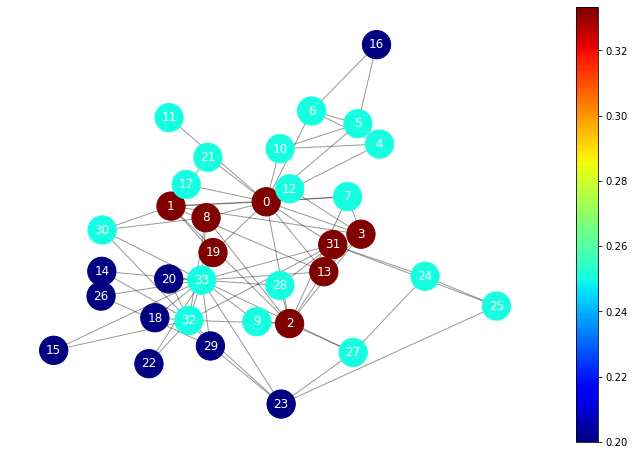

In [252]:
# grafico da centralidade de excentricidade

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cec)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('cec.png', transparent=True,dpi=300)
plt.show()

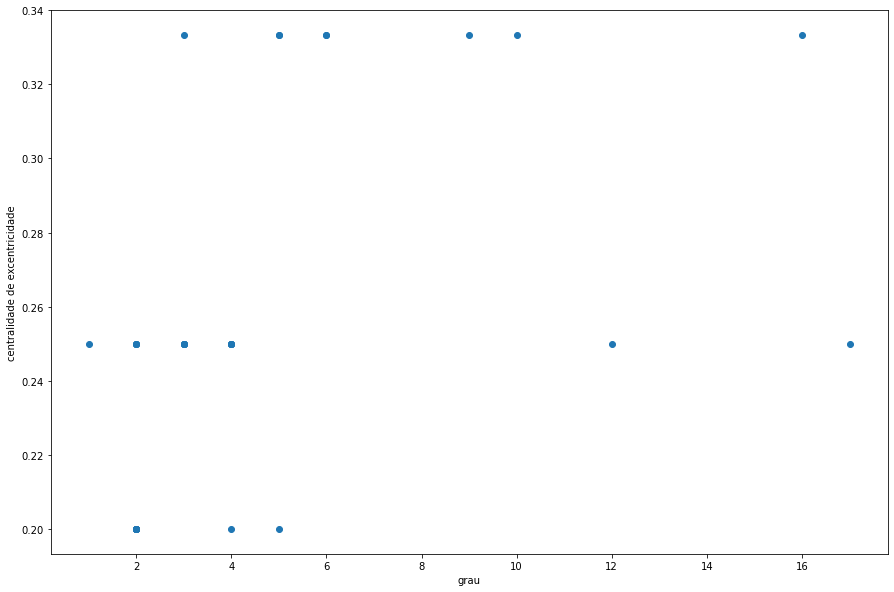

In [253]:
# grau x centralidade de excentricidade

fig, ax = plt.subplots(1,1,figsize=(15,10))
plt.plot(val_grau, val_cec, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de excentricidade')
plt.show()

### Centralidade de proximidade

- A **centralidade de proximidade** pontua cada nó com base em sua **proximidade** com todos os outros nós da rede.

- Esta medida calcula os caminhos mais curtos entre todos os nós e, em seguida, atribui a cada nó uma pontuação com base na soma dos caminhos mais curtos.

- Podemos usar essa medida para encontrar os nós que estão em melhor posição para influenciar toda a rede mais rapidamente.

- A **centralidade de proximidade** do nó $i$ é igual ao reciproco da média aritmética das distâncias geodésicas do nó $i$ para os demais nós $j$ da mesma componente do nó $i$, ou seja
$$
C_{c}(i) = \dfrac{|V_i| - 1}{\sum_{j \in {V_i - \{i\}}} d(i,j)} \; \forall \; i \in V_i
$$

- **nx.closeness_centrality()**: função do networkx que retorna a centralidade de proximidade de cada nó da rede.

In [254]:
# calculo da centralidade de proximidade

dic_cc  = nx.closeness_centrality(KCG)
val_cc  = list(dic_cc.values())

#set_cc = set(val_cc)
#print(f"CEC = {set_cc}")

#for i in set_cc:
#    print(i, end= " : ")
#    for key, value in dic_cc.items():
#        if i == dic_cc[key]:
#            print(key, end=", ")
#    print()

In [255]:
# rank em relacao a centralidade de proximidade

ranks = [(k, v) for k, v in sorted(dic_cc.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(0, 0.5689655172413793),
 (2, 0.559322033898305),
 (33, 0.55),
 (31, 0.5409836065573771),
 (8, 0.515625),
 (13, 0.515625),
 (32, 0.515625),
 (19, 0.5),
 (1, 0.4852941176470588),
 (3, 0.4647887323943662)]

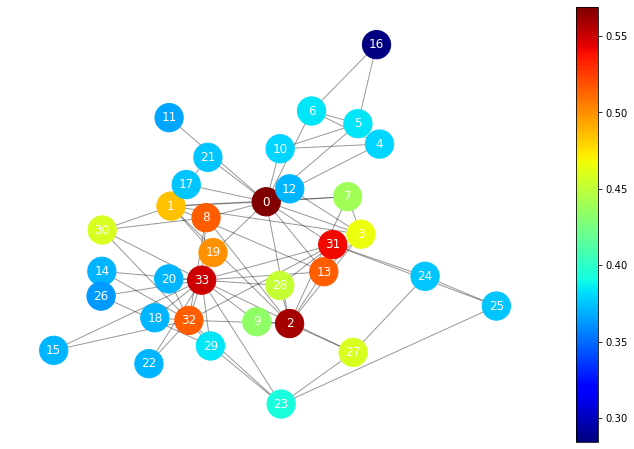

In [256]:
# grafico da centralidade de proximidade

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cc)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('closeness_centrality.png', transparent=True,dpi=300)
plt.show()

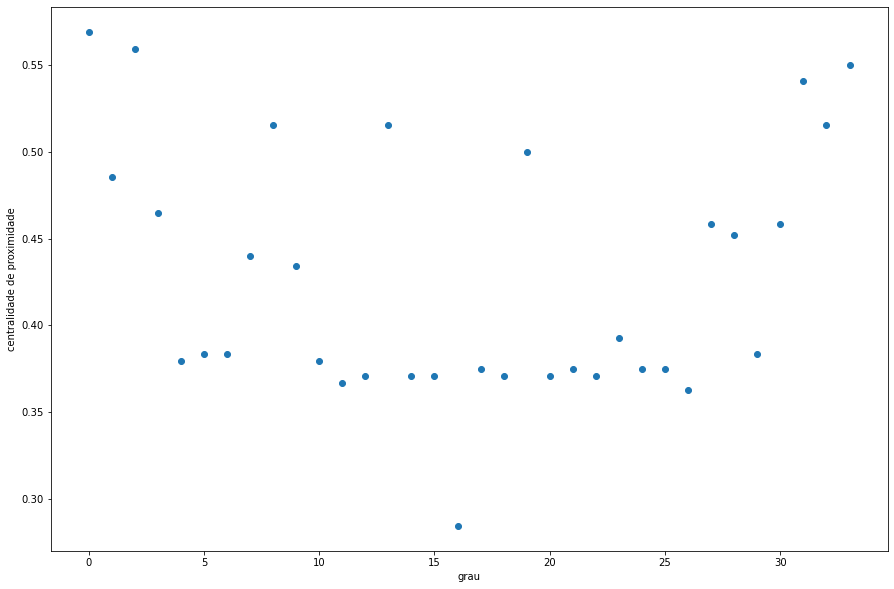

In [257]:
# grau x centralidade de proximidade

fig, ax = plt.subplots(1,1,figsize=(15,10))
plt.plot(nodes_, val_cc, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de proximidade')
plt.show()

### Centralidade harmônica

- Na **centralidade harmônica** a média aritmética das distâncias presente na **centralidade de proximidade** é substituida pela **média harmônica** das mesmas em que nós pertencentes a componentes distintas possuem distâncias infinitas entre si, ou seja,
$$
C_h(i) = \dfrac{1}{n-1} \left[ \sum_{j\not=i} \dfrac{1}{d(i,j)} \right] \; \forall \; i \in V
$$

- **nx.harmonic_centrality()**: função do networkx que retorna o centralidade harmônica de cada nó da rede, sem normalizar(sem dividor por $n-1$).

- A **centralidade harmônica** contorna o problema de redes com mais de uma componente conexas, onde temos distâncias geodésicas infinitas.

In [258]:
# calculo da centralidade harmonica

dic_chu = nx.harmonic_centrality(KCG)
val_chu = list(nx.harmonic_centrality(KCG).values())

set_chu = set(val_chu)
print(f"CHU = {len(set_chu)}")

for i in set_chu:
    print(i, end= " : ")
    for key, value in dic_chu.items():
        if i == dic_chu[key]:
            print(key, end=", ")
    print()


# imprime a centralidade harmonica
#for key, value in dic_chu.items():
#    print(f"centralidade harmonica do v{key} : {value}")

CHU = 26
11.099999999999996 : 16, 
13.916666666666666 : 24, 
13.916666666666664 : 25, 
13.950000000000001 : 26, 
14.200000000000003 : 14, 15, 18, 20, 22, 
14.16666666666667 : 17, 21, 
13.500000000000004 : 11, 
14.66666666666667 : 4, 10, 
15.16666666666667 : 5, 6, 
16.41666666666667 : 7, 
17.66666666666667 : 3, 
18.5 : 8, 13, 
19.16666666666667 : 1, 
21.0 : 2, 
23.16666666666666 : 0, 
19.333333333333336 : 31, 
20.916666666666668 : 32, 
23.25 : 33, 
14.000000000000004 : 12, 
15.583333333333334 : 9, 
15.366666666666669 : 29, 
16.033333333333335 : 23, 
16.916666666666664 : 27, 
16.416666666666664 : 28, 
16.916666666666668 : 30, 
17.5 : 19, 


In [259]:
# rank em relacao a centralidade harmonica

ranks = [(k, v) for k, v in sorted(dic_chu.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 23.25),
 (0, 23.16666666666666),
 (2, 21.0),
 (32, 20.916666666666668),
 (31, 19.333333333333336),
 (1, 19.16666666666667),
 (8, 18.5),
 (13, 18.5),
 (3, 17.66666666666667),
 (19, 17.5)]

In [260]:
# centraliade harmonica normalizada

#chn = [x/(len(val_chu)-1) for x in val_chu]  # normalização

# normalizacao
dic_chn = {}
for key, value in dic_chu.items():
    dic_chn[key] = value/(n-1)
    #dic_chn[key] = chn[key]

val_chn = list(dic_chn.values())

#set_chn = set(val_chn)
#print(f"CHN = {len(set_chn)}")

#for i in set_chn:
#    print(i, end= " : ")
#    for key, value in dic_chn.items():
#        if i == dic_chn[key]:
#            print(key, end=", ")
#    print()

#for key, value in dic_chn.items():
#    print(f"centralidade harmonica normalizada do v{key} : {value}")

In [261]:
# rank em relacao a centralidade harmonica normalizada

ranks = [(k, v) for k, v in sorted(dic_chn.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(33, 0.23484848484848486),
 (0, 0.23400673400673394),
 (2, 0.21212121212121213),
 (32, 0.2112794612794613),
 (31, 0.1952861952861953),
 (1, 0.19360269360269364),
 (8, 0.18686868686868688),
 (13, 0.18686868686868688),
 (3, 0.1784511784511785),
 (19, 0.17676767676767677)]

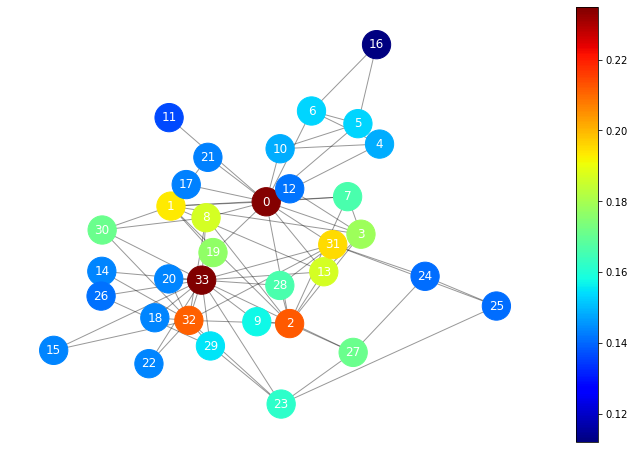

In [262]:
# gráfico da centralidade harmonica normalizada

G = KCG

fig, ax = plt.subplots(1,1,figsize=(12,8))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = val_chn

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

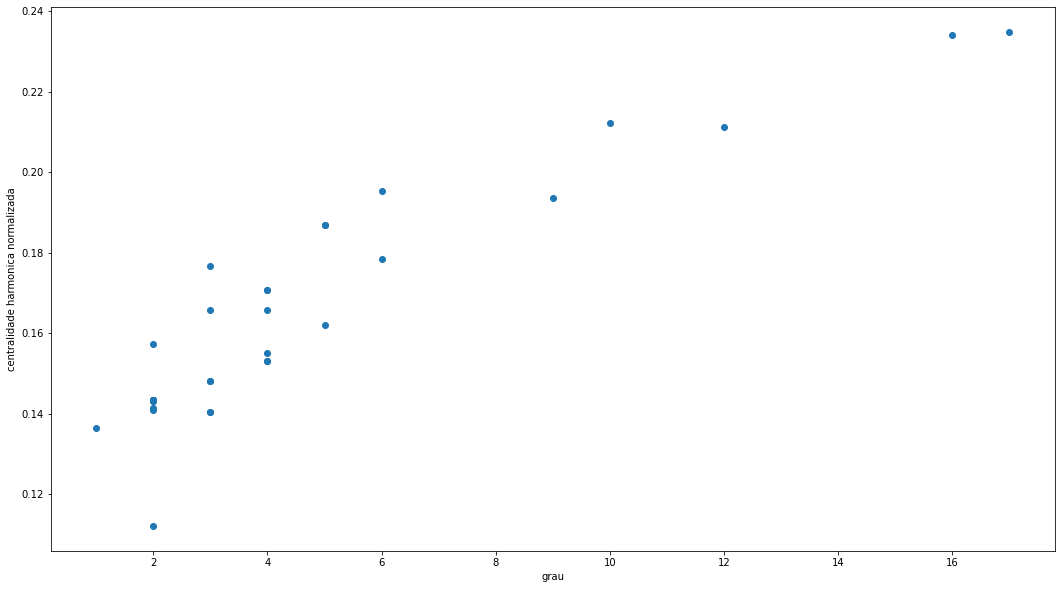

In [263]:
# grau x centralidade harmonica normalizada

fig, ax = plt.subplots(1,1,figsize=(18,10))
plt.plot(val_grau, val_chn , 'o')
plt.xlabel('grau')
plt.ylabel('centralidade harmonica normalizada')
plt.show()


### Centralidade de p-média

- A **centralidade de p-média** usa a noção de média generalizadas das distâncias.

- A **centralidade de p-média** generaliza as três médias anteriores: excentricidade, proximidade e harmônica.

- Fórmula da **centralidade de p-média**:

\begin{equation*}
C_{p}(i) = \left\{
\begin{matrix}
\left( \dfrac{\sum_{j \in  V_{i}-\{i\}} d(i,j)^p}{n-1} \right)^{\dfrac{-1}{p}}, \; se \; p \not= 0 \\
\left( \prod_{j \in V_{i}-\{i\}} d(i,j) \right)^{\dfrac{-1}{n-1}}, \; se \; p = 0 \\
\end{matrix}
\right.
\end{equation*}

In [264]:
# centralidade generalizada

n = KCG.number_of_nodes()

# valores de p
# linspace is an in-built function in Python's NumPy library. 
# It is used to create an evenly spaced sequence in a specified interval.
p = np.linspace(-1,1,n)

# comprimento dos caminhos mais curtos desde nó 1
sp = np.array(list(nx.shortest_path_length(KCG,1).values()))

# centralidade generalizada para o nó 1
cp = np.zeros(n)
for k in range(n):
    if p[k]:
        cp[k] = np.mean(sp[1:]** p[k])**(-1.0/p[k])
    else :
        cp[k] = np.prod(sp[1:])**(-1.0/(n - 1))

In [265]:
print(p)

[-1.         -0.93939394 -0.87878788 -0.81818182 -0.75757576 -0.6969697
 -0.63636364 -0.57575758 -0.51515152 -0.45454545 -0.39393939 -0.33333333
 -0.27272727 -0.21212121 -0.15151515 -0.09090909 -0.03030303  0.03030303
  0.09090909  0.15151515  0.21212121  0.27272727  0.33333333  0.39393939
  0.45454545  0.51515152  0.57575758  0.63636364  0.6969697   0.75757576
  0.81818182  0.87878788  0.93939394  1.        ]


In [266]:
print(sp)

[0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3]


In [267]:
print(nx.shortest_path(KCG,1))

{1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 3], 7: [1, 7], 13: [1, 13], 17: [1, 17], 19: [1, 19], 21: [1, 21], 30: [1, 30], 4: [1, 0, 4], 5: [1, 0, 5], 6: [1, 0, 6], 8: [1, 0, 8], 10: [1, 0, 10], 11: [1, 0, 11], 12: [1, 0, 12], 31: [1, 0, 31], 9: [1, 2, 9], 27: [1, 2, 27], 28: [1, 2, 28], 32: [1, 2, 32], 33: [1, 13, 33], 16: [1, 0, 5, 16], 24: [1, 0, 31, 24], 25: [1, 0, 31, 25], 23: [1, 2, 27, 23], 14: [1, 2, 32, 14], 15: [1, 2, 32, 15], 18: [1, 2, 32, 18], 20: [1, 2, 32, 20], 22: [1, 2, 32, 22], 29: [1, 2, 32, 29], 26: [1, 13, 33, 26]}


In [268]:
print(nx.shortest_path_length(KCG,1))

{1: 0, 0: 1, 2: 1, 3: 1, 7: 1, 13: 1, 17: 1, 19: 1, 21: 1, 30: 1, 4: 2, 5: 2, 6: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 27: 2, 28: 2, 31: 2, 32: 2, 33: 2, 14: 3, 15: 3, 16: 3, 18: 3, 20: 3, 22: 3, 23: 3, 24: 3, 25: 3, 26: 3, 29: 3}


In [269]:
set_cp = set(cp)
#print("set_cp: ", set_cp)

for i in set_cp:
    print(i, end= " : ")
    for key in range(len(cp)):
        if i == cp[key]:
            print(key, end=", ")
    print()

#for i in range(len(cp)):
#    print(f"cp node {i} :  {cp[i]}")

0.5808080808080809 : 0, 
0.5773649074347137 : 1, 
0.5739428328326334 : 2, 
0.5705436669457304 : 3, 
0.5671691688048112 : 4, 
0.5638210410716109 : 5, 
0.5605009249290044 : 6, 
0.557210395355349 : 7, 
0.5539509568162438 : 8, 
0.5507240394018958 : 9, 
0.5475309954328849 : 10, 
0.5204996536712873 : 19, 
0.4993328699567602 : 27, 
0.48980118558245106 : 31, 
0.5262242941714637 : 17, 
0.5043613004318304 : 25, 
0.5069415512364585 : 24, 
0.5443730965514806 : 11, 
0.5381674032613998 : 13, 
0.4852941176470588 : 33, 
0.5412515313099311 : 12, 
0.5321154400196955 : 15, 
0.5095658040992932 : 23, 
0.4968845585438002 : 28, 
0.49447999254880154 : 29, 
0.4921189574284908 : 30, 
0.5018250846846161 : 26, 
0.5122339557484754 : 22, 
0.48752635995819854 : 32, 
0.51770117276051 : 20, 
0.5351217295535942 : 14, 
0.529149376756068 : 16, 
0.5149458295731395 : 21, 
0.5233408594881189 : 18, 


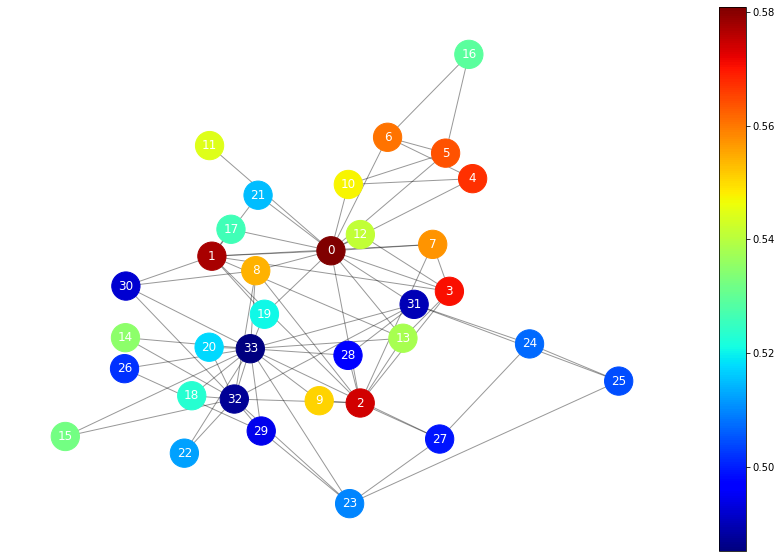

In [270]:
# centralidade generalizada

fig, ax = plt.subplots(1,1,figsize=(15,10))

# rede
G = KCG

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = cp

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G, 
                               pos=pos, 
                               node_size=800,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

### Centralidade de intermediação

- A **centralidade de intermediação** quantifica o quanto os vértices são capazes de atuar como intermediários entre outros dois vértices, podendo portanto controlar o fluxo de informação entre eles.

- $Q_{j,k}$: número de caminhos geodésicos iniciando no vértice $j$ e terminando no vértice $k$.

- $Q_{j,k}(i)$: número de caminhos geodésicos que iniciam em $j$, terminam em $k$ e passam pelo vértice $i$.

- $\dfrac{Q_{j,k}(i)}{Q_{j,k}}$: determina a importância do vértice $i$ para a conexão entre $j$ e $k$. Quanto maioro valor, maior é a importância do vértice $i$ para a conexão entre $j$ e $k$.

- Fórmula da centralidade por intermediação

$$
C_{b}(i) = \dfrac{1}{(n-1)(n-2)} \left[ \sum_{(j,k):j\not=k, i \not\in \{ j,k\}} \dfrac{Q_{j,k}(i)}{Q_{j,k}} \right] \; \forall \; i \in V
$$

- Função do networkx: **nx.betweenness_centrality()**

In [271]:
# calculo da centralidade de intermediação 

dic_cb = nx.betweenness_centrality(KCG, normalized=True)
val_cb = list(dic_cb.values())

#set_cb = set(dic_cb.values())
#print("set_cb: ", set_cb)

#for i in set_cb:
#    print(i, end= " : ")
#    for key, value in dic_cb.items():
#        if i == dic_cb[key]:
#            print(key, end=", ")
#    print()

#for key, value in dic_cb.items():
#    print(f"centralidade de intermediação do v{key} : {value}")

In [272]:
# rank em relacao a centralidade de autovetor

ranks = [(k, v) for k, v in sorted(dic_cb.items(), key=lambda item: -item[1])]

# os k melhores
k = 10
ranks[0:k]

[(0, 0.43763528138528146),
 (33, 0.30407497594997596),
 (32, 0.145247113997114),
 (2, 0.14365680615680618),
 (31, 0.13827561327561325),
 (8, 0.05592682780182781),
 (1, 0.053936688311688304),
 (13, 0.04586339586339586),
 (19, 0.03247504810004811),
 (5, 0.02998737373737374)]

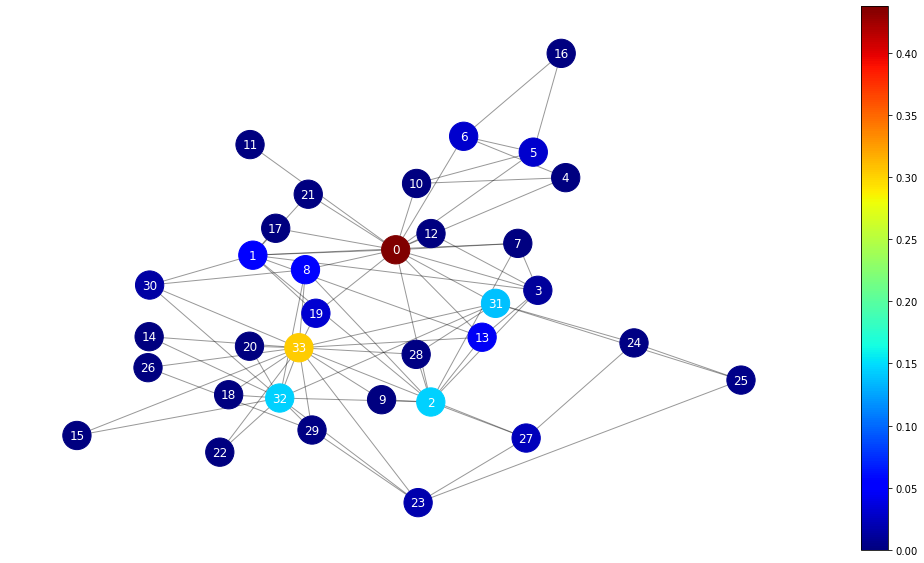

In [273]:
# gráfico da centralidade de intermediação 

G = KCG

fig, ax = plt.subplots(1,1,figsize=(18,10))

# layout position
pos = nx.kamada_kawai_layout(G)

# color of nodes
color = list(val_cb)

# draw edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               node_size=800,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

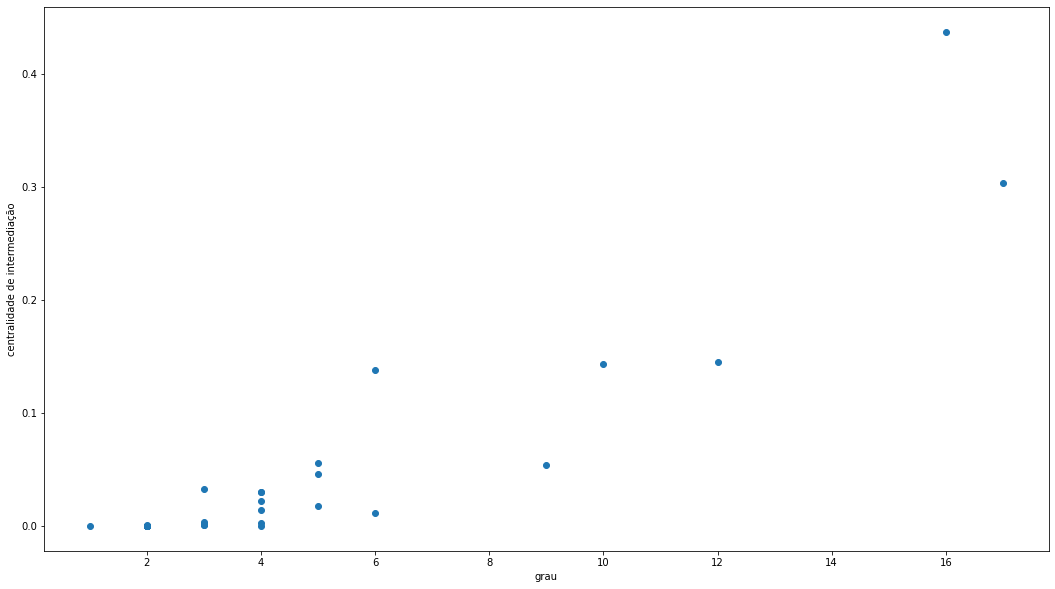

In [274]:
# grau x centralidade de intermediacao

fig, ax = plt.subplots(1,1,figsize=(18,10))
plt.plot(val_grau, val_cb, 'o')
plt.xlabel('grau')
plt.ylabel('centralidade de intermediação')
plt.show()

In [275]:
# centralidade de intermediação
cb = nx.betweenness_centrality(BTG,normalized = True)

for key, value in cb.items():
    print("centralidade de intermediação do nó", key, ":", value)

centralidade de intermediação do nó 0 : 0.6666666666666667
centralidade de intermediação do nó 1 : 0.0
centralidade de intermediação do nó 2 : 0.13333333333333336
centralidade de intermediação do nó 3 : 0.0
centralidade de intermediação do nó 4 : 0.36190476190476195
centralidade de intermediação do nó 5 : 0.0
centralidade de intermediação do nó 6 : 0.13333333333333336
centralidade de intermediação do nó 7 : 0.0
centralidade de intermediação do nó 8 : 0.6666666666666667
centralidade de intermediação do nó 9 : 0.0
centralidade de intermediação do nó 10 : 0.13333333333333336
centralidade de intermediação do nó 12 : 0.36190476190476195
centralidade de intermediação do nó 11 : 0.0
centralidade de intermediação do nó 13 : 0.0
centralidade de intermediação do nó 14 : 0.13333333333333336
centralidade de intermediação do nó 15 : 0.0


### k-shell

- O valor do **k-shell** está relacionado com a centralidade de grau dos nós e consiste na decomposição da rede em camadas.

- Os nós que possuem grau zero são nós isolados, constituem a camada $0$ da rede.

- Os nós que possuem grau $k$, fazem parte da camada $k$ da rede.

- O maior valor de camada de uma rede é denotado por **kmax** e é também uma medida global da rede. 

- A união de todos os nós que fazem parte de uma camada maior ou igual a $k$ constitui o **$k$-core** da rede.

- A união de todos os nós que fazem parte de uma camada menor ou igual a $k$ constitui o **$k$-crust** da rede. 

Funções do networkx:

- **nx.core_number()**: retorna o índice de shell de cada nó, isto é, o número do maior k-core que cada nó pertence.

- **nx.k_shell()**: retorna o subgrafo com os nós em um $k$-shell.

- **nx.k_core()**: retorna o subgrafo com todos os nós em um $k$-core.

 - **nx.k_crust()**: retorna o subgrafo com todos os nós em um $k$-crust.

In [334]:
# Exemplo 2.8
G = nx.Graph()
G.add_nodes_from(range(15))
G.add_edges_from([(0,1),(0,2),(0,3),(1,2),(1 ,3),(2 ,3)])
G.add_edge(3,4)
G.add_edges_from([(4,5),(4,6),(4,7)])
G.add_edge(3,8)
G.add_edge(2,9)
G.add_edges_from([(1,10),(2,10),(10,11)])
G.add_edges_from([(1,12),(1,13),(12,13)])

In [335]:
print("number of nodes=", nx.number_of_nodes(G))
print("number of edges=", nx.number_of_edges(G))

number of nodes= 15
number of edges= 18


In [336]:
G_copy = G

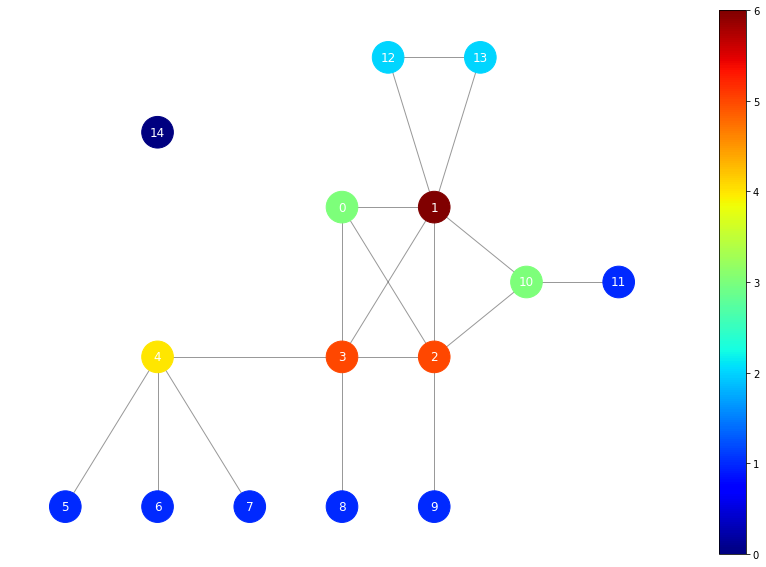

In [337]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position

#pos = nx.spring_layout(G,seed=123456789,k=0.3)

pos = nx.circular_layout(G)
pos[0] = [0.00,0.00]
pos[1] = [0.50,0.00]
pos[2] = [0.50,-0.50]
pos[3] = [0.00,-0.50]
pos[4] = [-1.00,-0.50]
pos[5] = [-1.50,-1.00]
pos[6] = [-1.00,-1.00]
pos[7] = [-0.50,-1.00]
pos[8] = [0.00,-1.00]
pos[9] = [0.50,-1.00]
pos[10] = [1.00,-0.25]
pos[11] = [1.50,-0.25]
pos[12] = [0.25,0.50]
pos[13] = [0.75,0.50]
pos[14] = [-1.00,0.25]

# color of nodes
color = list(dict(nx.degree(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               pos=pos,
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(G,
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('graphG.png', transparent=True, dpi=300)
plt.show()

In [315]:
# calculo dos cores de cada no

dic_core = nx.core_number(G)
val_core = list(dic_core.values())

set_core = set(dic_core.values())
print(f"Core = {set_core}")

for i in set_core:
    print(i, end= " : ")
    for key, value in dic_core.items():
        if i == dic_core[key]:
            print(key, end=", ")
    print()

Core = {0, 1, 2, 3}
0 : 14, 
1 : 4, 5, 6, 7, 8, 9, 11, 
2 : 10, 12, 13, 
3 : 0, 1, 2, 3, 


In [316]:
# calculo do graus de cada no

dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

Grau = {0, 1, 2, 3, 4, 5, 6}
0 : 14, 
1 : 5, 6, 7, 8, 9, 11, 
2 : 12, 13, 
3 : 0, 10, 
4 : 4, 
5 : 2, 3, 
6 : 1, 


In [317]:
grau = 0
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        #print(key)
        G.remove_node(key)

In [318]:
print(f"nos: {G.nodes()}")

nos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [320]:
# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

Grau = {1, 2, 3, 4, 5, 6}
1 : 5, 6, 7, 8, 9, 11, 
2 : 12, 13, 
3 : 0, 10, 
4 : 4, 
5 : 2, 3, 
6 : 1, 


In [321]:
grau = 1
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        #print(key)
        G.remove_node(key)

In [322]:
print(f"nos: {G.nodes()}")

nos: [0, 1, 2, 3, 4, 10, 12, 13]


In [323]:
# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

Grau = {1, 2, 3, 4, 6}
1 : 4, 
2 : 10, 12, 13, 
3 : 0, 
4 : 2, 3, 
6 : 1, 


In [324]:
grau = 1
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        #print(key)
        G.remove_node(key)

In [325]:
# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

Grau = {2, 3, 4, 6}
2 : 10, 12, 13, 
3 : 0, 3, 
4 : 2, 
6 : 1, 


In [326]:
grau = 2
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        #print(key)
        G.remove_node(key)

In [327]:
# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

Grau = {3}
3 : 0, 1, 2, 3, 


In [328]:
grau = 3
for key, value in dic_grau.items():
    if dic_grau[key]==grau:
        #print(key)
        G.remove_node(key)

In [329]:
# calcula o graus de cada no
dic_grau = dict(nx.degree(G))
val_grau = dic_grau.values()

set_grau = set(dic_grau.values())
print(f"Grau = {set_grau}")

for i in set_grau:
    print(i, end= " : ")
    for key, value in dic_grau.items():
        if i == dic_grau[key]:
            print(key, end=", ")
    print()

Grau = set()


In [338]:
G = G_copy

In [343]:
# Visualize the nodes in k-core
# Note that k-core is the all network
for k in set_core:
    print(k, "core:", list(nx.k_core(G,k)))


0 core: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
1 core: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
2 core: [0, 1, 2, 3, 10, 12, 13]
3 core: [0, 1, 2, 3]


In [344]:
# Visualize the nodes in k-shell
# Note that vertices in k-shell are member of k-core, 
# however they are not member of (k+1)-core
for k in set_core:
    print(k, "shell:", list(nx.k_shell(G, k)))

0 shell: [14]
1 shell: [4, 5, 6, 7, 8, 9, 11]
2 shell: [10, 12, 13]
3 shell: [0, 1, 2, 3]


In [345]:
# Visualize the nodes in k-crust
for k in set_core:
    print(k, "crust:", list(nx.k_crust(G, k)))

0 crust: [14]
1 crust: [4, 5, 6, 7, 8, 9, 11, 14]
2 crust: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
3 crust: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


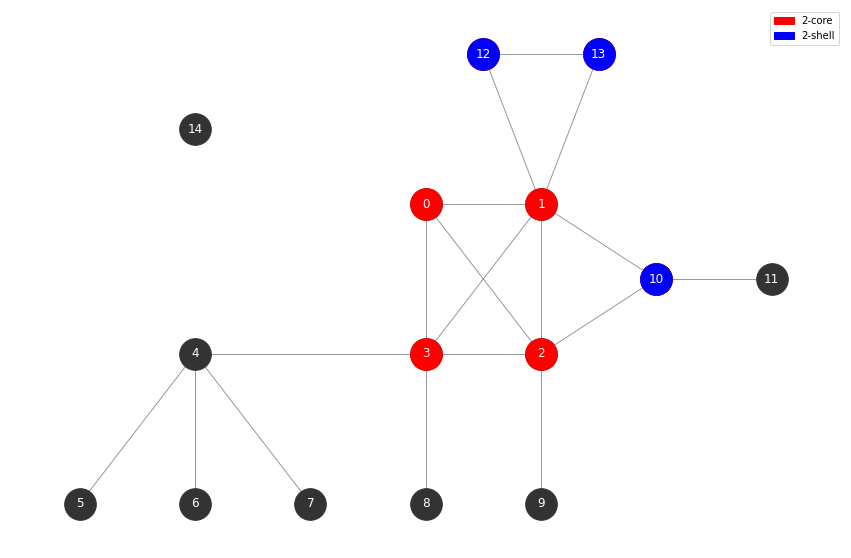

In [346]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# Find k-cores and k-shell
ks = 2
k = 2
k_shell = nx.k_shell(G, ks)
k_core = nx.k_core(G, k)

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               pos=pos,
                               node_size=1000,
                               node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(k_core,
                               pos=pos,
                               node_size=1000,
                               node_color="red")

# draw nodes
nodes = nx.draw_networkx_nodes(k_shell,
                               pos=pos,
                               node_size=1000,
                               node_color="blue")

# draw labels
nx.draw_networkx_labels(G,
                        pos=pos,
                        font_color='white', 
                        ax=ax)

# static legend
red_patch = mpatches.Patch(color='red', label=f'{ks}-core')
blue_patch = mpatches.Patch(color='blue', label=f'{ks}-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
#plt.savefig('k_core_G', transparent=True,dpi=600)
plt.show()

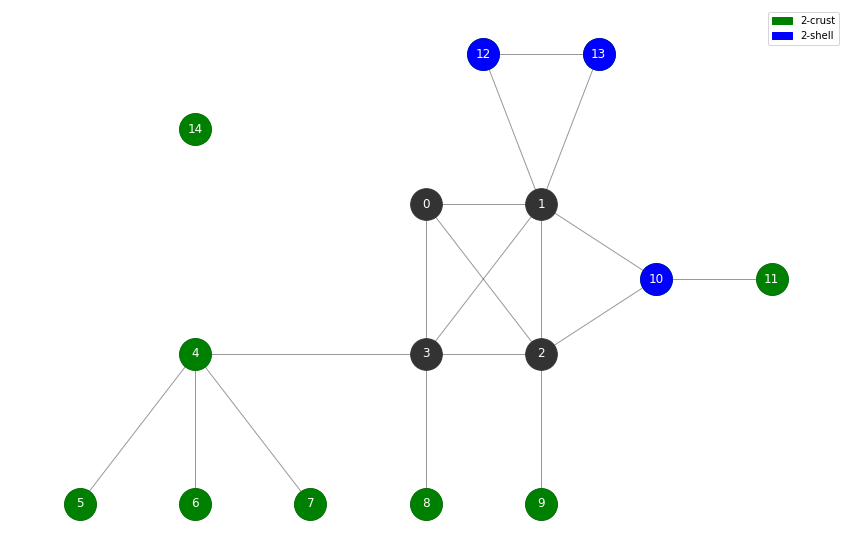

In [347]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

# Find k-crust and k-shell
ks = 2
k = 2
k_shell = nx.k_shell(G, ks)
k_crust = nx.k_crust(G, k)

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                               pos=pos,
                               node_size=1000,
                               node_color="#333333")

# draw nodes
nodes = nx.draw_networkx_nodes(k_crust,
                               pos=pos,
                               node_size=1000,
                               node_color="green")

# draw nodes
nodes = nx.draw_networkx_nodes(k_shell,
                               pos=pos,
                               node_size=1000,
                               node_color="blue")

# draw labels
nx.draw_networkx_labels(G,
                        pos=pos,
                        font_color='white', 
                        ax=ax)

# static legend
green_patch = mpatches.Patch(color='green', label=f'{k}-crust')
blue_patch = mpatches.Patch(color='blue', label=f'{ks}-shell')
plt.legend(handles=[green_patch,blue_patch])

plt.axis("off")
#plt.savefig('k_crust_shell_G', transparent=True,dpi=600)
plt.show()

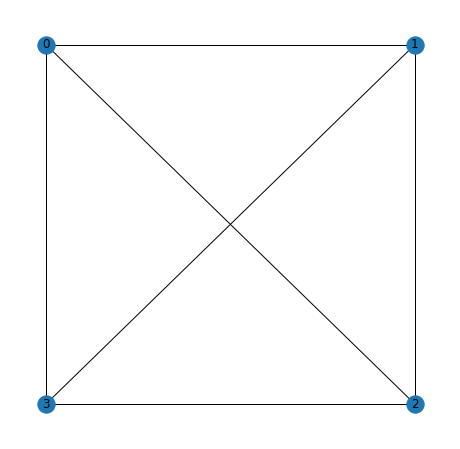

In [348]:
# Subgrafos de shells e de cores
fig, ax = plt.subplots(1,1,figsize=(8,8))

ks = 3
G_shell = nx.core.k_shell(G,ks)
nx.draw(G_shell, pos, with_labels = True)

plt.axis("off")
plt.show()

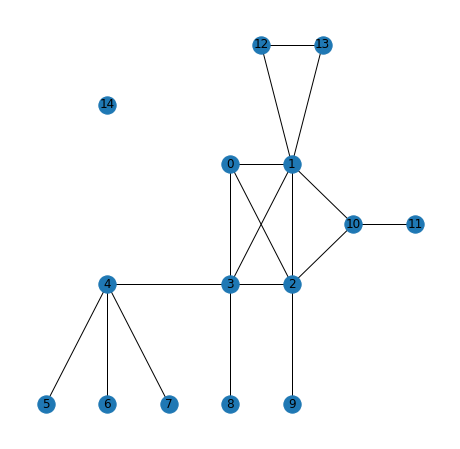

In [349]:
# Subgrafos de shells e de cores

fig, ax = plt.subplots(1,1,figsize=(8,8))

kc = 0 # core number
G_shell = nx.core.k_core(G,kc)
nx.draw(G_shell, pos, with_labels = True)

plt.axis("off")
plt.show()

### Exemplo: grafo de Erdõs Rényi

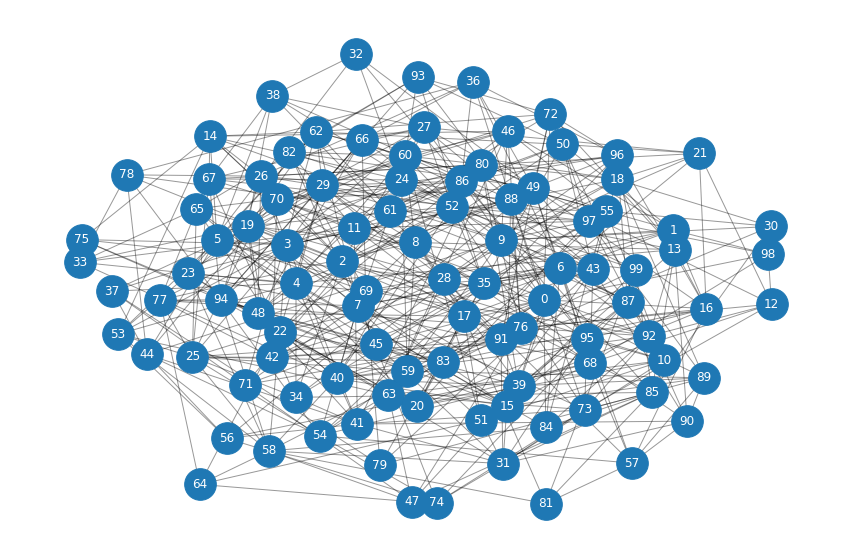

In [166]:
# grafo aleatório de Erdös - Rényi com 100 nós e probabilidade 0.1

ERG = nx.erdos_renyi_graph(100,0.1)
n = ERG.number_of_nodes()
m = ERG.number_of_edges()

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
# pos = nx.spring_layout(BTG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(ERG)

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white',
                        ax=ax)

plt.axis("off")
plt.show()

In [167]:
print(nx.is_connected(ERG))

True


In [168]:
print("aresta: ", nx.number_of_edges(ERG))

aresta:  508


In [169]:
# Graus dos vertices
graus = dict(nx.degree(ERG))

for key, value in graus.items():
    print("grau do nó", key, ":", value)

grau do nó 0 : 14
grau do nó 1 : 10
grau do nó 2 : 11
grau do nó 3 : 12
grau do nó 4 : 14
grau do nó 5 : 13
grau do nó 6 : 13
grau do nó 7 : 13
grau do nó 8 : 16
grau do nó 9 : 12
grau do nó 10 : 9
grau do nó 11 : 10
grau do nó 12 : 7
grau do nó 13 : 9
grau do nó 14 : 11
grau do nó 15 : 11
grau do nó 16 : 11
grau do nó 17 : 12
grau do nó 18 : 10
grau do nó 19 : 11
grau do nó 20 : 11
grau do nó 21 : 8
grau do nó 22 : 14
grau do nó 23 : 9
grau do nó 24 : 12
grau do nó 25 : 14
grau do nó 26 : 12
grau do nó 27 : 12
grau do nó 28 : 12
grau do nó 29 : 14
grau do nó 30 : 6
grau do nó 31 : 13
grau do nó 32 : 5
grau do nó 33 : 6
grau do nó 34 : 8
grau do nó 35 : 12
grau do nó 36 : 8
grau do nó 37 : 6
grau do nó 38 : 8
grau do nó 39 : 13
grau do nó 40 : 15
grau do nó 41 : 12
grau do nó 42 : 9
grau do nó 43 : 13
grau do nó 44 : 8
grau do nó 45 : 9
grau do nó 46 : 10
grau do nó 47 : 7
grau do nó 48 : 13
grau do nó 49 : 15
grau do nó 50 : 11
grau do nó 51 : 8
grau do nó 52 : 13
grau do nó 53 : 9
gr

In [170]:
print(set(graus.values()))

{5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


In [171]:
# Graus de centralidade
grau_center = nx.degree_centrality(ERG)

for key, value in grau_center.items():
    print("grau de centralidade do nó ", key, ":", value)

grau de centralidade do nó  0 : 0.14141414141414144
grau de centralidade do nó  1 : 0.10101010101010102
grau de centralidade do nó  2 : 0.11111111111111112
grau de centralidade do nó  3 : 0.12121212121212122
grau de centralidade do nó  4 : 0.14141414141414144
grau de centralidade do nó  5 : 0.13131313131313133
grau de centralidade do nó  6 : 0.13131313131313133
grau de centralidade do nó  7 : 0.13131313131313133
grau de centralidade do nó  8 : 0.16161616161616163
grau de centralidade do nó  9 : 0.12121212121212122
grau de centralidade do nó  10 : 0.09090909090909091
grau de centralidade do nó  11 : 0.10101010101010102
grau de centralidade do nó  12 : 0.07070707070707072
grau de centralidade do nó  13 : 0.09090909090909091
grau de centralidade do nó  14 : 0.11111111111111112
grau de centralidade do nó  15 : 0.11111111111111112
grau de centralidade do nó  16 : 0.11111111111111112
grau de centralidade do nó  17 : 0.12121212121212122
grau de centralidade do nó  18 : 0.10101010101010102
gra

In [172]:
print(set(grau_center.values()))

{0.14141414141414144, 0.12121212121212122, 0.10101010101010102, 0.13131313131313133, 0.11111111111111112, 0.16161616161616163, 0.09090909090909091, 0.07070707070707072, 0.08080808080808081, 0.06060606060606061, 0.15151515151515152, 0.05050505050505051}


In [173]:
ec = nx.eccentricity(ERG)

for key, value in ec.items():
    print("excentricidade do nó",key,":", value)


excentricidade do nó 0 : 3
excentricidade do nó 1 : 3
excentricidade do nó 2 : 3
excentricidade do nó 3 : 3
excentricidade do nó 4 : 3
excentricidade do nó 5 : 3
excentricidade do nó 6 : 3
excentricidade do nó 7 : 3
excentricidade do nó 8 : 3
excentricidade do nó 9 : 3
excentricidade do nó 10 : 3
excentricidade do nó 11 : 3
excentricidade do nó 12 : 3
excentricidade do nó 13 : 3
excentricidade do nó 14 : 3
excentricidade do nó 15 : 3
excentricidade do nó 16 : 3
excentricidade do nó 17 : 3
excentricidade do nó 18 : 3
excentricidade do nó 19 : 3
excentricidade do nó 20 : 3
excentricidade do nó 21 : 3
excentricidade do nó 22 : 3
excentricidade do nó 23 : 3
excentricidade do nó 24 : 3
excentricidade do nó 25 : 3
excentricidade do nó 26 : 3
excentricidade do nó 27 : 3
excentricidade do nó 28 : 3
excentricidade do nó 29 : 3
excentricidade do nó 30 : 3
excentricidade do nó 31 : 3
excentricidade do nó 32 : 3
excentricidade do nó 33 : 3
excentricidade do nó 34 : 3
excentricidade do nó 35 : 3
ex

In [174]:
print(set(ec.values()))

{3, 4}


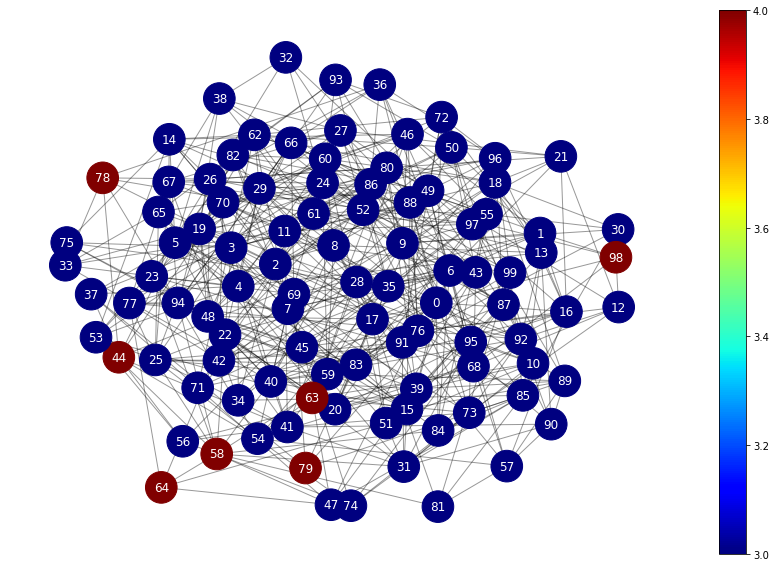

In [175]:
# gráfico da excentricidade de G

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
#pos = nx.spring_layout(ERG,seed=123456789,k=0.3)
pos = nx.kamada_kawai_layout(ERG)

# color of nodes based on eccentricity
color = list(ec.values())

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG,
                               node_size=1000,
                               pos=pos,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos, 
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
#plt.savefig('excentricidade.png', transparent=True,dpi=300)
plt.show()

In [176]:
# centralidade de excentricidade
cec = [1.0/ec[i] for i in ec]

#for key, value in ec.items():
#    print("node",key,":", cec[key])

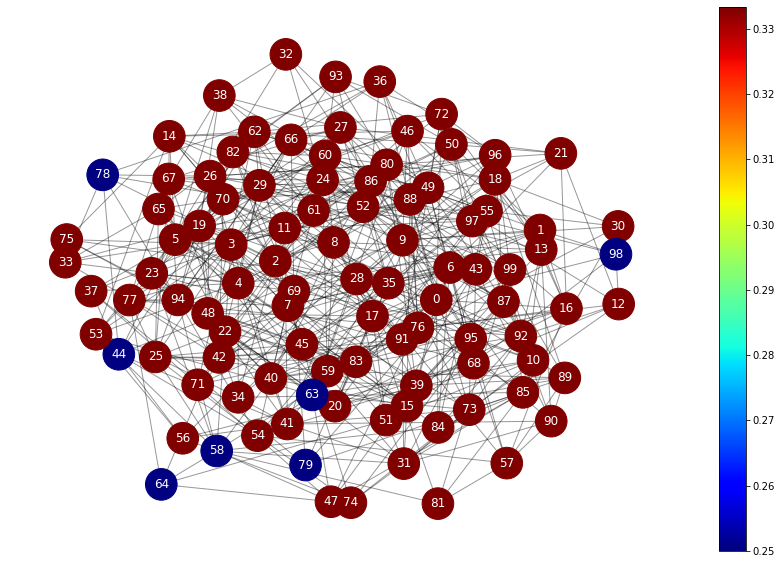

In [177]:
# centralidade de excentricidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = list(cec)

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [178]:
# centralidade de proximidade
cc = nx.closeness_centrality(ERG)

#for key, value in cc.items():
#    print("node",key,":", value)

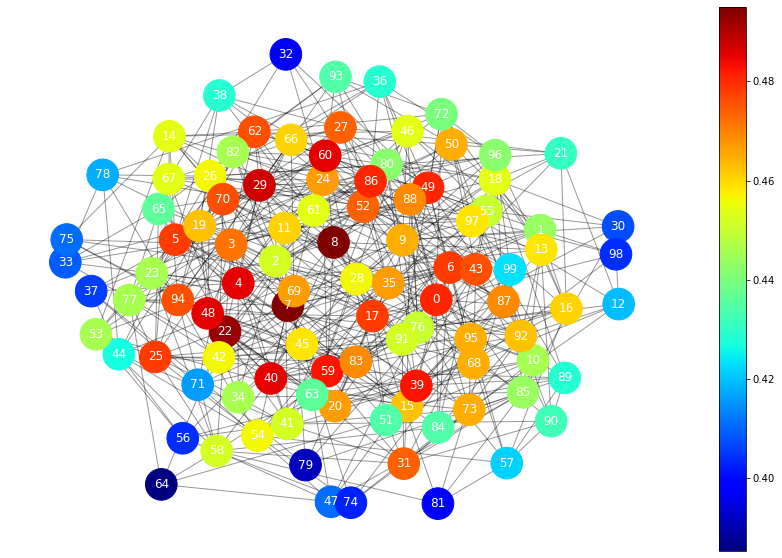

In [179]:
# centralidade de proximidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = list(cc.values())

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)
# Find k-crust e k-shell

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [180]:
# centralidade harmônica
n = nx.number_of_nodes(ERG)
ch = nx.harmonic_centrality(ERG)
chn = [ x /(n - 1) for x in ch] # normalização

#for key, value in ec.items():
#    print("node",key,":", ch[key])

In [181]:
print(set(ch.values()))

{41.416666666666686, 42.666666666666686, 43.83333333333337, 44.00000000000001, 45.50000000000001, 46.83333333333336, 47.833333333333364, 48.66666666666669, 49.50000000000002, 50.00000000000002, 51.00000000000002, 51.16666666666667, 51.666666666666686, 51.16666666666669, 52.000000000000014, 52.66666666666668, 52.166666666666686, 52.833333333333364, 52.00000000000003, 53.66666666666667, 53.33333333333336, 53.50000000000002, 54.500000000000014, 49.16666666666669, 50.666666666666686, 51.16666666666668, 50.66666666666669, 49.500000000000014, 49.000000000000014, 49.5, 42.166666666666686, 42.66666666666667, 43.66666666666669, 43.50000000000002, 48.500000000000014, 43.75000000000001, 44.16666666666669, 44.66666666666668, 44.00000000000003, 45.166666666666686, 49.50000000000001, 45.416666666666686, 46.66666666666667, 46.66666666666669, 46.583333333333364, 46.00000000000001, 46.83333333333335, 47.16666666666668, 47.75000000000002, 47.33333333333335, 47.00000000000001, 47.000000000000014, 48.5000

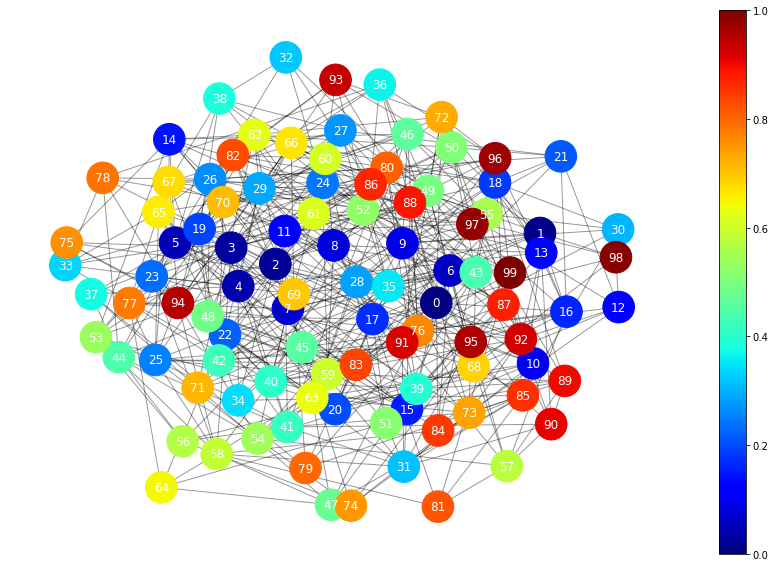

In [182]:
# centralidade harmonica

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = list(chn)

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()

In [183]:
# centralidade generalizada

# valores de p
p = np.linspace(-1,50,100)

# comprimento dos caminhos mais curtos desde nó 1
sp = np.array(list(nx.shortest_path_length(ERG,1).values()))

# centralidade generalizada para o nó 1
cp = np.zeros_like(p)

for k in range(p.shape[0]):
    if p[k]:
        cp[k] = np.mean(sp[1:]** p[k])**(-1.0/p[k])
    else :
        cp[k] = np.prod(sp[1:])**(-1.0/(sp.shape[0] - 1))

In [184]:
for k in range(p.shape[0]):
    print("centralidade generalizada do nó %d: %f" %(k,cp[k]))

centralidade generalizada do nó 0: 0.491582
centralidade generalizada do nó 1: 0.476824
centralidade generalizada do nó 2: 0.463936
centralidade generalizada do nó 3: 0.452695
centralidade generalizada do nó 4: 0.442853
centralidade generalizada do nó 5: 0.434181
centralidade generalizada do nó 6: 0.426483
centralidade generalizada do nó 7: 0.419602
centralidade generalizada do nó 8: 0.413415
centralidade generalizada do nó 9: 0.407825
centralidade generalizada do nó 10: 0.402759
centralidade generalizada do nó 11: 0.398158
centralidade generalizada do nó 12: 0.393972
centralidade generalizada do nó 13: 0.390161
centralidade generalizada do nó 14: 0.386688
centralidade generalizada do nó 15: 0.383522
centralidade generalizada do nó 16: 0.380633
centralidade generalizada do nó 17: 0.377995
centralidade generalizada do nó 18: 0.375583
centralidade generalizada do nó 19: 0.373377
centralidade generalizada do nó 20: 0.371356
centralidade generalizada do nó 21: 0.369501
centralidade general

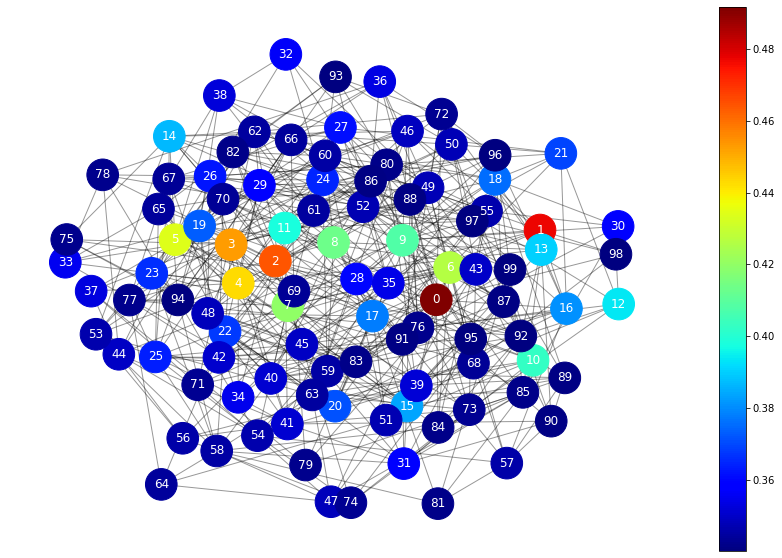

In [185]:
# centralidade de proximidade

fig, ax = plt.subplots(1,1,figsize=(15,10))

# layout position
pos = nx.kamada_kawai_layout(ERG)

# color of nodes
color = cp

# draw edges
nx.draw_networkx_edges(ERG, 
                       pos=pos, 
                       alpha=0.4, 
                       ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(ERG, 
                               pos=pos, 
                               node_size=1000,
                               node_color=color,
                               cmap=plt.cm.jet,
                               ax=ax)

# draw labels
nx.draw_networkx_labels(ERG, 
                        pos=pos,
                        font_color='white', 
                        ax=ax)

plt.axis("off")
plt.colorbar(nodes)
plt.show()